# **Implementacion de regresión lineal (Refinamiento)**

Michelle Yareni Morales Ramón A01552627

In [64]:
#librerias
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score



**Datos**


Para este entregable se uso un dataset de kaggle llamado 'CO2 emissions by vehicles': https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

In [65]:
#lectura de datos
from google.colab import drive
drive.mount('/content/gdrive')
df=pd.read_csv('/content/gdrive/MyDrive/IA_concentracion/co2_prueba.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [66]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Para hacer la implementación se usó 'Fuel Consumption Comb (mpg)' como variable independiente y 'CO2 Emissions(g/km)' como variable dependiente, es decir que es la variable a predecir.

In [67]:
X = df['Fuel Consumption Comb (mpg)']
y = df['CO2 Emissions(g/km)']

# **Primer modelo**

**Separacion de los datos (Train y Test)**


Primera prueba:


- train size: 0.8
- random state: 10

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 10,
                                        shuffle      = True
                                    )

**Implementacion del modelo**

In [69]:
model1 = LinearRegression()
model1.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

**Validacion del modelo**

Tanto en el subset de entrenamiento como en el subset de validacion se obtuvo un error muy grande. El MSE es ligeramente mayor en el conjunto de validacion pero el MAE y R2 son casi iguales en ambos conjuntos.

Esto significa que el modelo no esta aprendiendo lo suficiente.

In [70]:
#subset de entrenamiento
y_train_pred = model1.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)

r2_train = r2_score(y_train, y_train_pred)


print("subset de entrenamiento")
print(f"MSE en conjunto de entrenamiento: {mse_train:.2f}")
print(f"MAE en conjunto de entrenamiento: {mae_train:.2f}")
print(f"R2 en conjunto de entrenamiento: {r2_train:.2f}")


subset de entrenamiento
MSE en conjunto de entrenamiento: 593.33
MAE en conjunto de entrenamiento: 16.03
R2 en conjunto de entrenamiento: 0.83


In [71]:
#subset validacion
y_validation_pred = model1.predict(X_test)
mse_validation = mean_squared_error(y_test, y_validation_pred)
mae_validation = mean_absolute_error(y_test, y_validation_pred)
r2_validation = r2_score(y_test, y_validation_pred)

print("subset de validacion")
print(f"MSE en conjunto de Validacion: {mse_validation:.2f}")
print(f"MAE en conjunto de Validacion: {mae_validation:.2f}")
print(f"R2 en conjunto de Validacion: {r2_validation:.2f}")

subset de validacion
MSE en conjunto de Validacion: 649.53
MAE en conjunto de Validacion: 16.62
R2 en conjunto de Validacion: 0.82


**Diagnostico del grado de bias o sesgo y de la varianza**

En la grafica se observa que hay un sesgo alto. Al tratarse de una regresion lineal simple es de esperar que el modelo no se ajuste perfectamente a los datos de prueba. Los datos tienen un comportamiento de tipo curva por lo que es posible que con una regresion de segundo orden se ajuste mejor.

In [73]:
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)


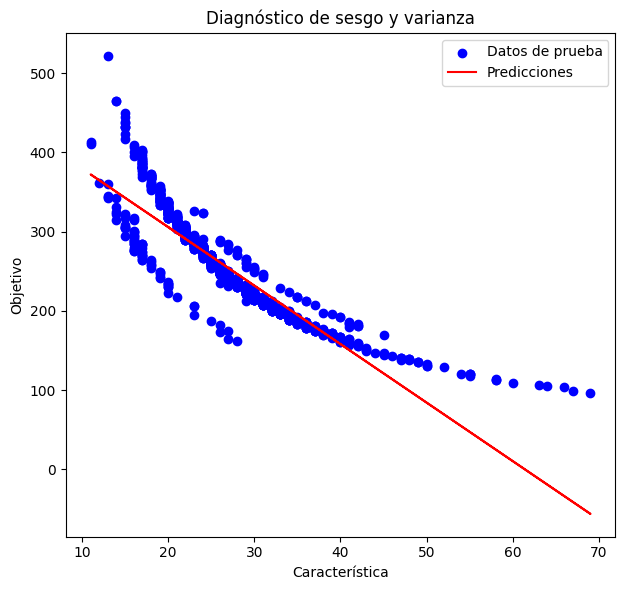

In [74]:
# Gráfico de diagnóstico de Bias (Sesgo)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label='Datos de prueba', color='b')
plt.plot(X_test, y_test_pred, label='Predicciones', color='r')
plt.xlabel('Característica')
plt.ylabel('Objetivo')
plt.title('Diagnóstico de sesgo y varianza')
plt.legend()

plt.tight_layout()
plt.show()





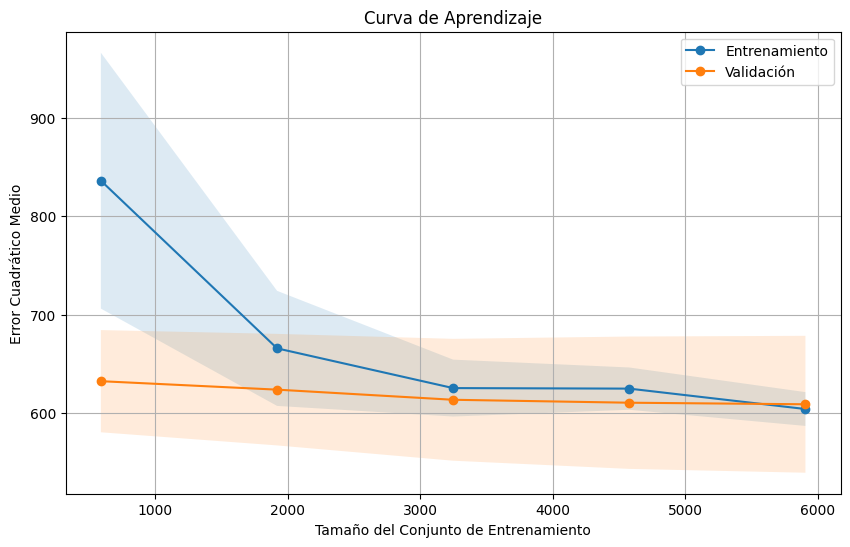

In [75]:
#curvas de aprendizaje

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model1, X.values.reshape(-1,1), y.values.reshape(-1,1), cv=5, scoring='neg_mean_squared_error')

# Calcular las medias y desviaciones estándar de los puntajes
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Crear el gráfico de curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Entrenamiento', marker='o', linestyle='-')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validación', marker='o', linestyle='-')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio')
plt.legend()
plt.title('Curva de Aprendizaje')
plt.grid(True)
plt.show()

**Diagnostico del nivel de ajuste del modelo**

De acuerdo a lo obtenido en la validacion del error del modelo y en las gráficas podríamos concluir que el modelo tiene undefiting ya que no se ajustan bien las predicciones a los datos de prueba. El error en el set de entrenamiento y validacion son muy parecidos pero es un error bastante grande, en el grafico de dispersion se observa que hay seso y tiene cierto comportamiento cuadratico y en las curvas de aprendizaje se muestra que el error se estabiliza pero en valores muy altos.

# **Segundo modelo**

**Separacion de los subset train y test**

Se optó por hacer un modelo de regresion de segundo grado ya que los datos de prueba parecen ajustarse a una curva.

- train_size: 0.75
- random_state: 100

In [76]:
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import Ridge

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.75,
                                        random_state = 100,
                                        shuffle      = True
                                    )

**Implementacion de modelo de segundo grado**

In [78]:

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

LinearRegression()

**Validacion del modelo**

In [79]:
#subset de entrenamiento
y_train_pred = model2.predict(X_train_poly)

mse_train = mean_squared_error(y_train, y_train_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)

r2_train = r2_score(y_train, y_train_pred)


print("subset de entrenamiento")
print(f"MSE en conjunto de entrenamiento: {mse_train:.2f}")
print(f"MAE en conjunto de entrenamiento: {mae_train:.2f}")
print(f"R2 en conjunto de entrenamiento: {r2_train:.2f}")

subset de entrenamiento
MSE en conjunto de entrenamiento: 424.45
MAE en conjunto de entrenamiento: 10.73
R2 en conjunto de entrenamiento: 0.88


In [80]:
#subset validacion
y_validation_pred = model2.predict(X_test_poly)
mse_validation = mean_squared_error(y_test, y_validation_pred)
mae_validation = mean_absolute_error(y_test, y_validation_pred)
r2_validation = r2_score(y_test, y_validation_pred)

print("subset de validacion")
print(f"MSE en conjunto de validacion: {mse_validation:.2f}")
print(f"MAE en conjunto de validacion: {mae_validation:.2f}")
print(f"R2 en conjunto de validacion: {r2_validation:.2f}")

subset de validacion
MSE en conjunto de validacion: 411.61
MAE en conjunto de validacion: 10.85
R2 en conjunto de validacion: 0.88


**Diagnostico de sesgo o bias y varianza**

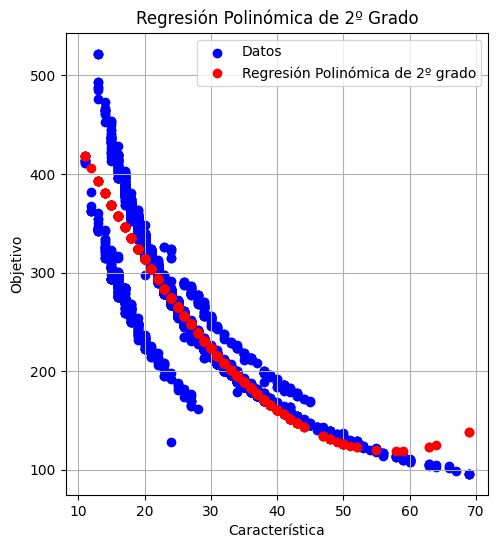

In [81]:
y_test_pred = model2.predict(X_test_poly)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
#X.values.reshape(-1, 1)
plt.scatter(X.values.reshape(-1, 1), y, label='Datos', color='b')
plt.plot(X_test, y_test_pred, label='Regresión Polinómica de 2º grado', color='r',marker='o', linestyle='',)
plt.xlabel('Característica')
plt.ylabel('Objetivo')
plt.legend()
plt.title('Regresión Polinómica de 2º Grado')
plt.grid(True)
plt.show()




**Curvas de aprendizaje**

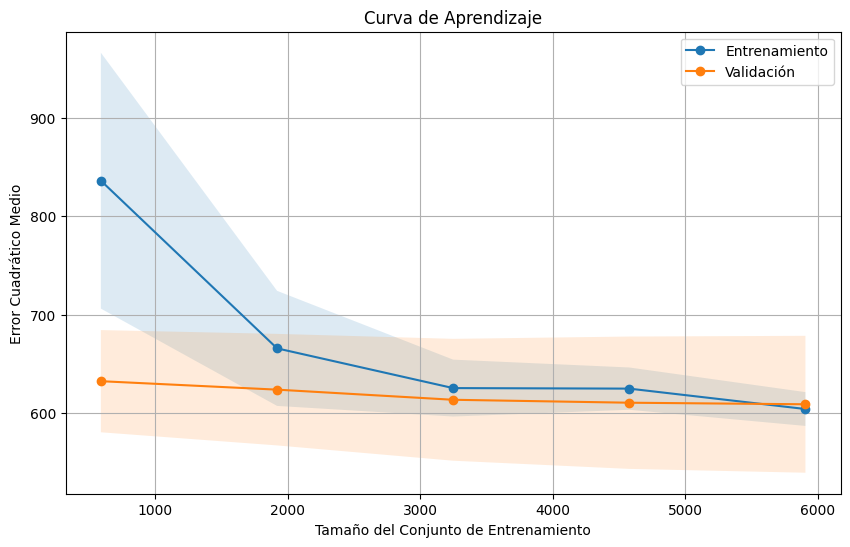

In [82]:
#curvas de aprendizaje

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model2, X.values.reshape(-1,1), y.values.reshape(-1,1), cv=5, scoring='neg_mean_squared_error')

# Calcular las medias y desviaciones estándar de los puntajes
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Crear el gráfico de curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Entrenamiento', marker='o', linestyle='-')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validación', marker='o', linestyle='-')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio')
plt.legend()
plt.title('Curva de Aprendizaje')
plt.grid(True)
plt.show()

**Diagnostico del nivel de ajuste del modelo**

El error si disminuyo pero sigue siendo un error grande, sin embargo en el diagrama de dispersion se observa que los datos se ajustan mucho mejor a la curva por lo que podriamos decir que el modelo si mejoro considerablemente pero puede que siga habiendo algo de underfiting por los errores tan grandes que hay en el MSE.

**Conclusiones:**

El segundo modelo tuvo mejor desempeño que el primero, ya que se usó una regresion de segundo grado. Los datos se ajustaron mejor a la curva y el error disminuyó, sin embargo sigue siendo un error muy grande por lo que es probable que siga habiendo underfiting.